# Product Review sentimental anlysis.

## Data:- Womens cloths review from ecomerce website.
## Source:- Data is taken from kaggle.

In [2]:
##importing laibaries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
## loading the data set
df=pd.read_csv('Clothing review.csv.csv')

In [6]:
## Checking the shape of the data
df.shape

(23486, 11)

In [7]:
## checking the data
df.head()

,Unnamed: 0,Clothing ID,Age,Title,Review Text,Rating,Recommended IND,Positive Feedback Count,Division Name,Department Name,Class Name
0,0,767,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,1,1080,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,2,1077,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,3,1049,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,4,847,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [9]:
## checking data type & null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23486 entries, 0 to 23485
Data columns (total 11 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   Unnamed: 0               23486 non-null  int64 
 1   Clothing ID              23486 non-null  int64 
 2   Age                      23486 non-null  int64 
 3   Title                    19676 non-null  object
 4   Review Text              22641 non-null  object
 5   Rating                   23486 non-null  int64 
 6   Recommended IND          23486 non-null  int64 
 7   Positive Feedback Count  23486 non-null  int64 
 8   Division Name            23472 non-null  object
 9   Department Name          23472 non-null  object
 10  Class Name               23472 non-null  object
dtypes: int64(6), object(5)
memory usage: 2.0+ MB


## EDA & Data visualization

In [10]:
## dropping unnessary features
df.drop(['Unnamed: 0','Clothing ID'], axis=1, inplace=True)

In [12]:
df.rename(columns={'Review Text': 'text',
                    'Positive Feedback Count': 'feedback_count',
                    'Division Name': 'Division', 'Department Name': 'Department',
                    'Class Name':'Class', 'Recommended IND': 'Recommended'},inplace=True)

In [13]:
df.head()

,Age,Title,text,Rating,Recommended,feedback_count,Division,Department,Class
0,33,NaN,Absolutely wonderful - silky and sexy and comf...,4,1,0,Initmates,Intimate,Intimates
1,34,NaN,Love this dress! it's sooo pretty. i happene...,5,1,4,General,Dresses,Dresses
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses


In [15]:
## null value checking
df.isnull().sum()

Age                  0
Title             3810
text               845
Rating               0
Recommended          0
feedback_count       0
Division            14
Department          14
Class               14
dtype: int64

In [16]:
## droping NA from our dataset
df.dropna(axis=0, inplace=True)

In [17]:
df.head()

,Age,Title,text,Rating,Recommended,feedback_count,Division,Department,Class
2,60,Some major design flaws,I had such high hopes for this dress and reall...,3,0,0,General,Dresses,Dresses
3,50,My favorite buy!,"I love, love, love this jumpsuit. it's fun, fl...",5,1,0,General Petite,Bottoms,Pants
4,47,Flattering shirt,This shirt is very flattering to all due to th...,5,1,6,General,Tops,Blouses
5,49,Not for the very petite,"I love tracy reese dresses, but this one is no...",2,0,4,General,Dresses,Dresses
6,39,Cagrcoal shimmer fun,I aded this in my basket at hte last mintue to...,5,1,1,General Petite,Tops,Knits


In [18]:
df.isnull().sum()

Age               0
Title             0
text              0
Rating            0
Recommended       0
feedback_count    0
Division          0
Department        0
Class             0
dtype: int64

### All null values are removed !

In [19]:
df.shape

(19662, 9)

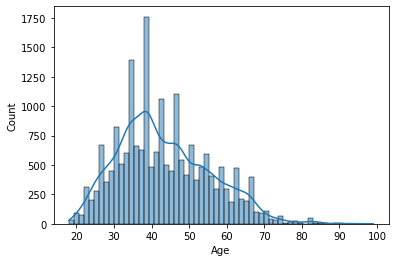

In [21]:
## cheking age
sns.histplot(data=df, x='Age', kde=True)
plt.show()

### From above most of womens customer are in the age of 36-40!

<AxesSubplot:xlabel='Rating', ylabel='Count'>

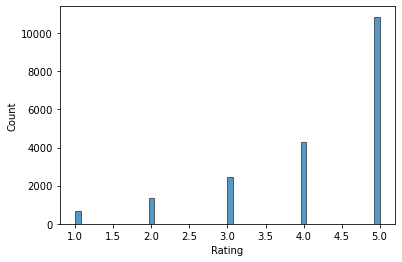

In [22]:
## Checking for rating
sns.histplot(data=df, x='Rating', kde=False)

### From above most of the customer giving 5 star rating its mean most of customer liking the product !

<AxesSubplot:xlabel='Rating', ylabel='Class'>

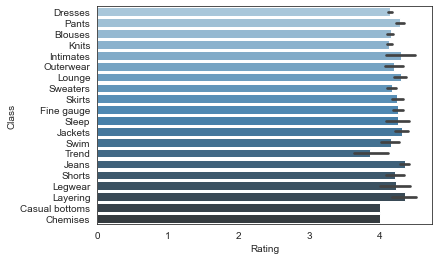

In [23]:
## Rating VS product
sns.set_style('white')
sns.barplot(x=df['Rating'], y=df['Class'],palette="Blues_d")

<AxesSubplot:xlabel='Age', ylabel='Class'>

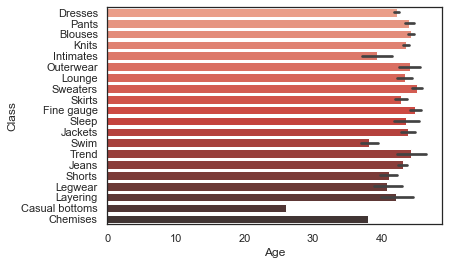

In [25]:
## Age VS Class
sns.set_theme(style="white")
sns.color_palette("mako", as_cmap=False)
sns.barplot(x=df['Age'], y=df['Class'],palette="Reds_d")

<AxesSubplot:ylabel='Rating'>

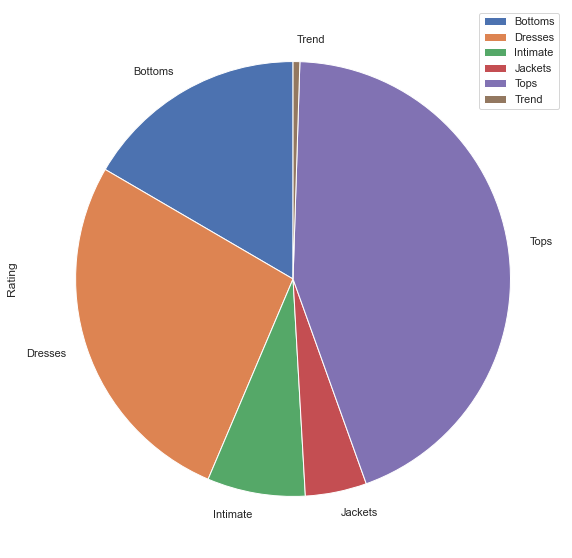

In [26]:
## product VS rating
df.groupby(['Department']).sum().plot(kind='pie', subplots=False, shadow = False,startangle=90,figsize=(15,10), y='Rating')

## From above Top catagory got maximum rating while trend got less rating !

# Text Mining

In [27]:
import nltk
from nltk.corpus import stopwords 
from nltk.stem.porter import PorterStemmer

In [28]:
## Extracting the text column from the data
df['all_text'] = df['text']

## Toknization of the data

In [29]:
 # Tokenize a Pandas dataframe columns and returns a list of tokens
def tokenize(column):.
    tokens = nltk.word_tokenize(column)
    return [w for w in tokens if w.isalpha]

In [30]:
df['tokenized'] = df.apply(lambda x: tokenize(x['all_text']), axis=1)
df[['text', 'tokenized']].head()

,text,tokenized
2,I had such high hopes for this dress and reall...,"[I, had, such, high, hopes, for, this, dress, ..."
3,"I love, love, love this jumpsuit. it's fun, fl...","[I, love, ,, love, ,, love, this, jumpsuit, .,..."
4,This shirt is very flattering to all due to th...,"[This, shirt, is, very, flattering, to, all, d..."
5,"I love tracy reese dresses, but this one is no...","[I, love, tracy, reese, dresses, ,, but, this,..."
6,I aded this in my basket at hte last mintue to...,"[I, aded, this, in, my, basket, at, hte, last,..."


## Removing stopwards !

In [31]:
def remove_stopwords(tokenized_column):
    # this fuction will retun a list of tokens with English stopwords removed
    stops = set(stopwords.words('english'))
    return [word for word in tokenized_column if not word in stops]

In [32]:
df['stopwords_removed'] = df.apply(lambda x: remove_stopwords(x['tokenized']), axis=1)
df[['text', 'stopwords_removed']].head()

,text,stopwords_removed
2,I had such high hopes for this dress and reall...,"[I, high, hopes, dress, really, wanted, work, ..."
3,"I love, love, love this jumpsuit. it's fun, fl...","[I, love, ,, love, ,, love, jumpsuit, ., 's, f..."
4,This shirt is very flattering to all due to th...,"[This, shirt, flattering, due, adjustable, fro..."
5,"I love tracy reese dresses, but this one is no...","[I, love, tracy, reese, dresses, ,, one, petit..."
6,I aded this in my basket at hte last mintue to...,"[I, aded, basket, hte, last, mintue, see, woul..."


## all stopwards are removed !

## Stemming of the data

In [34]:
def apply_stemming(tokenized_column):
    # this function will return a list of tokens with PorterStemming applied
    stemmer = PorterStemmer()
    return [stemmer.stem(word) for word in tokenized_column]

In [36]:
df['porter_stemmed'] = df.apply(lambda x: apply_stemming(x['stopwords_removed']), axis=1)
df[['text', 'porter_stemmed']].head()

,text,porter_stemmed
2,I had such high hopes for this dress and reall...,"[i, high, hope, dress, realli, want, work, ., ..."
3,"I love, love, love this jumpsuit. it's fun, fl...","[i, love, ,, love, ,, love, jumpsuit, ., 's, f..."
4,This shirt is very flattering to all due to th...,"[thi, shirt, flatter, due, adjust, front, tie,..."
5,"I love tracy reese dresses, but this one is no...","[i, love, traci, rees, dress, ,, one, petit, ...."
6,I aded this in my basket at hte last mintue to...,"[i, ade, basket, hte, last, mintu, see, would,..."


In [37]:
## Rejoin words
def rejoin_words(tokenized_column):
    # this fuction will rejoin the tokenized words list into a single string
    return (" ".join(tokenized_column))

In [38]:
df['rejoined'] = df.apply(lambda x: rejoin_words(x['porter_stemmed']), axis=1)
df[['text', 'rejoined']].head()

,text,rejoined
2,I had such high hopes for this dress and reall...,i high hope dress realli want work . initi ord...
3,"I love, love, love this jumpsuit. it's fun, fl...","i love , love , love jumpsuit . 's fun , flirt..."
4,This shirt is very flattering to all due to th...,thi shirt flatter due adjust front tie . perfe...
5,"I love tracy reese dresses, but this one is no...","i love traci rees dress , one petit . 5 feet t..."
6,I aded this in my basket at hte last mintue to...,i ade basket hte last mintu see would look lik...


## Model building.

In [40]:
from sklearn.model_selection import train_test_split
# spliting the data into trainng and testing data:- 
X_train, X_test, y_train, y_test = train_test_split(df['rejoined'],
                                                   df['Recommended'], test_size=0.3,random_state=0)

In [41]:
X_train.shape

(13763,)

## Countvectorizer

In [42]:
from sklearn.feature_extraction.text import CountVectorizer
# fit the countVectorizer to the training data:-
vect = CountVectorizer().fit(X_train)

In [48]:
vect.get_feature_names()[::1000]

['00', 'bear', 'cosi', 'fee', 'insert', 'multicolor', 'purc', 'snow', 'um']

In [49]:
len(vect.get_feature_names())

8699

In [50]:
# Transform the document in the training data to a document-term matrix
X_train_vectorized = vect.transform(X_train)
X_train_vectorized

<13763x8699 sparse matrix of type '<class 'numpy.int64'>'
	with 373045 stored elements in Compressed Sparse Row format>

### Create support vector machine classifier

In [51]:
from sklearn import svm
clf = svm.SVC(kernel='linear')
# train the classifier: 
clf.fit(X_train_vectorized, y_train)

SVC(kernel='linear')

In [52]:
## Model evaluation
from sklearn.metrics import accuracy_score, classification_report, f1_score
# predict the transformed test documents: =
predictions = clf.predict(vect.transform(X_test))
print(classification_report(y_test, predictions))
print('Accuracy score: ', round(accuracy_score(y_test, predictions,2)))
print('F1_score: ', round(f1_score(y_test, predictions,2)))

              precision    recall  f1-score   support

           0       0.64      0.61      0.62      1072
           1       0.91      0.92      0.92      4827

    accuracy                           0.87      5899
   macro avg       0.77      0.77      0.77      5899
weighted avg       0.86      0.87      0.86      5899

Accuracy score:  1
F1_score:  1


C:\Users\Aniket Mali\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass normalize=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
C:\Users\Aniket Mali\anaconda3\lib\site-packages\sklearn\utils\validation.py:70: FutureWarning: Pass labels=2 as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


## Term frequency invert document frequency vector(TF-IDF)

In [53]:
from sklearn.feature_extraction.text import TfidfVectorizer
# Fit the TfidfVectorizer to the training data specifiying a minimum document frequency of 5
vect = TfidfVectorizer(min_df = 5).fit(X_train)
len(vect.get_feature_names())

3066

In [54]:
X_train_vectorized = vect.transform(X_train)
model = svm.SVC(kernel='linear')
model.fit(X_train_vectorized, y_train)
predictions = model.predict(vect.transform(X_test))
print('accuracy :', accuracy_score(y_test, predictions))

accuracy : 0.8886251907102899


## So model accuracy is 88.86%

In [55]:
from wordcloud import WordCloud

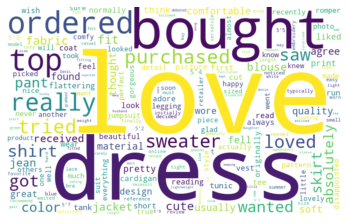

In [60]:
text = " ".join(cat.split()[1] for cat in df.text)
# Creating word_cloud with text as argument in .generate() method
word_cloud = WordCloud(collocations = False, background_color = 'white',width=800,height=500).generate(text)
# Display the generated Word Cloud
plt.imshow(word_cloud, interpolation='bilinear')
plt.axis("off")
plt.show()

# Conclusion

## 1) From wordcloud image most of the products are loved by the customers!

## 2) most of the customers have purchesed product like Top,sweater!

## 3) From above data visualization most of the customers are from age group of 36-40!